## Príklad 3 ##

$$D.T.$$

Načítanie potrebných knižníc

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

Preveďte pevnostnú kontrolu prizmatického prútu zaťaženého podľa obrázku. Dané : $a, b, R, d, q, F, \sigma_K, k_D$

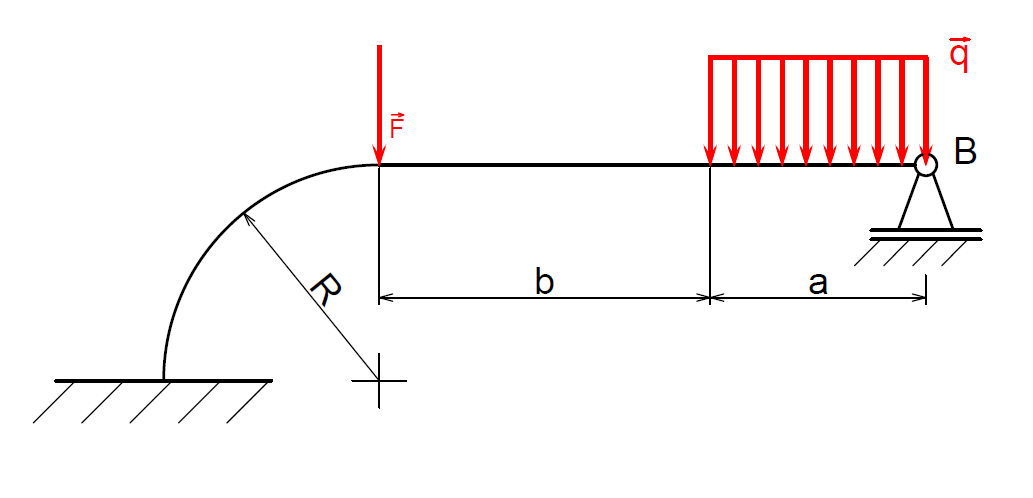

In [2]:
Image(filename='Ohyb3a.PNG', width=700, height=300)

Úplné uvoľnenie prútu:

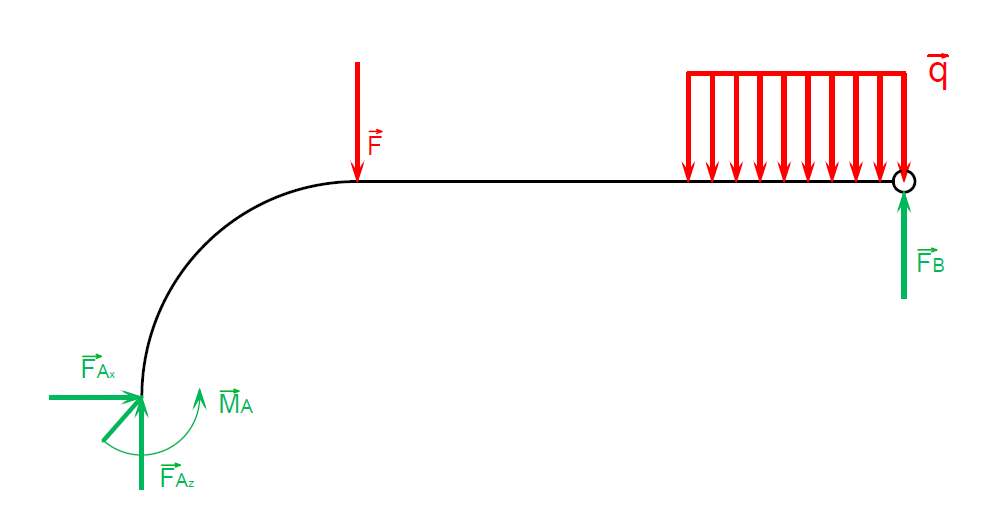

In [3]:
Image(filename='Ohyb3b.PNG', width=700, height=300)

Zavedenie potrebných symbolov:

In [4]:
a,b,d = sp.symbols('a b d')
x1,x2 = sp.symbols('x_1 x_2')
fi = sp.symbols('varphi')
q, F, FB= sp.symbols('q F F_B')
R = sp.symbols('R')
sigmaK,kD = sp.symbols('sigma_K k_D')

Čiastočné uvoľnenie pre určenie VVÚ:

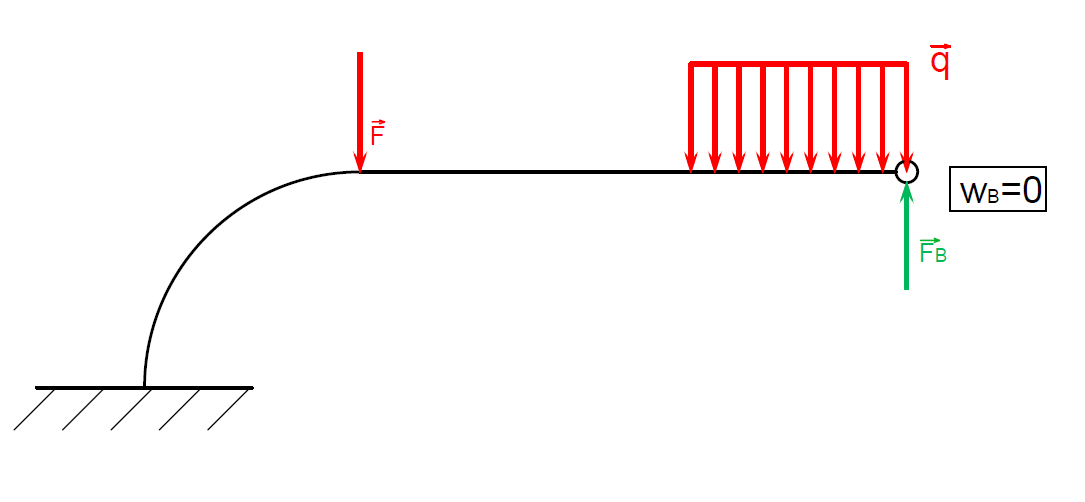

In [5]:
Image(filename='Ohyb3c.PNG', width=700, height=300)

Určenie $VVÚ$ od voľného konca:

Úsek I

pre $x_1\in(0,a)$

\begin{align*}
N_1(x) =\: & 0 \\ T_1(x) = \: & qx_1 - F_B \\ M_1(x) = \:& F_Bx_1 -\frac{qx_1^2}{2}\\
\end{align*}

Úsek II

pre $x_2\in(0,b)$

\begin{align*}
N_2(x) =\:& 0\\ T_2(x)=\:& qa - F_B \\ M_2(x)=\:& F_B(a + x_2) - qa\left(\frac{a}{2} + x_2\right)\\
\end{align*}

Úsek III

pre $\varphi\in(0,\frac{\pi}{2})$

\begin{align*}
N_3(\varphi)=\:& F_B\sin\varphi - qa\sin\varphi - F\sin\varphi\\ T_3(\varphi)=\:& F\cos\varphi + qa\cos\varphi - F_B\cos\varphi\\ 
M_3(\varphi)=\:& F_B(a + b + R\sin\varphi) - qa\left(\frac{a}{2} + b + R\sin\varphi\right) - FR\sin\varphi \\
\end{align*}

Zapísané v Pythone:

In [6]:
T1 = q*x1 - FB
M1 = FB*x1 - q*x1**2/2
T1, M1

In [7]:
T2 = q*a - FB
M2 = FB*(a+x2) - q*a*(a/2 + x2)
T2, M2

In [8]:
N3 = FB*sp.sin(fi) - q*a*sp.sin(fi) - F*sp.sin(fi)
T3 = F*sp.cos(fi) + q*a*sp.cos(fi) - FB*sp.cos(fi)
M3 = FB*(a+b+R*sp.sin(fi)) - q*a*(a/2 + b + R*sp.sin(fi)) - F*R*sp.sin(fi)
N3, T3, M3

Derivácie vnútorných účinkov podľa $F_B$:

In [9]:
dM1dFB = M1.diff(FB)
dM2dFB = M2.diff(FB)
dM3dFB = M3.diff(FB)
dM1dFB, dM2dFB, dM3dFB

Deformačná podmienka je v tvare : $$\frac{1}{EJ}\left[ \int\limits_{0}^{a}M_1(x)\frac{\partial M_1(x)}{\partial F_B} dx_1 + \
\int\limits_{0}^{b}M_2(x)\frac{\partial M_2(x)}{\partial F_B} dx_2 + \int\limits_{0}^{\frac{\pi}{2}}M_3(\varphi)\frac{\partial M_3(\varphi)}{\partial F_B}R d\varphi\right] =\: 0$$

Rovnica je homogénna a môžme ju teda zjednodušiť do tvaru:

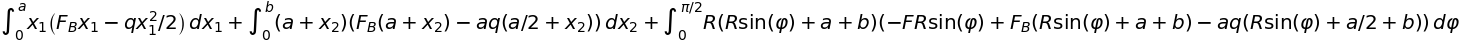

In [10]:
rov = sp.Integral(M1*dM1dFB,[x1,0,a]) + sp.Integral(M2*dM2dFB,[x2,0,b]) + sp.Integral(M3*dM3dFB*R,[fi,0,sp.pi/2])
rov

Integráciou dostaneme rovnicu o jednej neznámej $F_B$, ktorej riešenie vyzerá nasledovne:

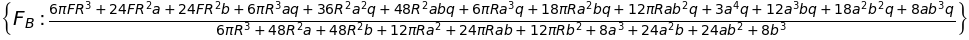

In [11]:
rov1 = rov.doit()
rov1 = sp.expand(rov1)
vysl = sp.solve([rov1],[FB])
vysl

Dosadenie čísel pre numerický výpočet:

In [12]:
a_ , b_, R_, d_ = 0.6, 0.8, 1., 0.05
q_, F_ = 600., 5000.
sigmaK_ = 400
kD_ = 2.5

Dosadenie numerických hodnôt do nznámej $F_B$ :

In [13]:
FB_ = vysl[FB].subs({a:a_,b:b_,q:q_,R:R_,F:F_,})
round(float(FB_),3)

Dosadenie číselnej hodnoty $F_B$ do výsledných vnútorných účinkov:

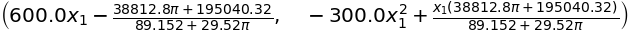

In [14]:
T1_ = T1.subs({q:q_,FB:FB_})
M1_ = M1.subs({q:q_,FB:FB_})
T1_, M1_

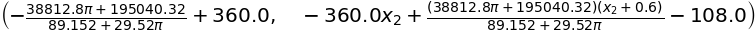

In [15]:
T2_ = T2.subs({q:q_,a:a_,FB:FB_})
M2_ = M2.subs({q:q_,a:a_,FB:FB_})
T2_, M2_

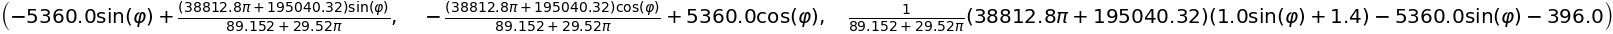

In [16]:
N3_ = N3.subs({FB:FB_,q:q_,a:a_,F:F_})
T3_ = T3.subs({FB:FB_,q:q_,a:a_,F:F_})
M3_ = M3.subs({FB:FB_,q:q_,a:a_,b:b_,F:F_,R:R_})
N3_, T3_, M3_

__Vyjadrenie výsledných vnútorných účinkov__

Vyjadrenie VVÚ pozdĺž strednice:

In [17]:
x1_ = np.linspace(0,a_,20)
T1_plot = [float(T1_.subs(x1,ii)) for ii in x1_]
M1_plot = [float(M1_.subs(x1,ii)) for ii in x1_]
x2_ = np.linspace(0,b_,20)
T2_plot = [float(T2_) for ii in x2_]
M2_plot = [float(M2_.subs(x2,ii)) for ii in x2_]

bodov=20
meritko=5.
meritko2=3.
fi_ = np.linspace(0,np.pi/2,20)
strednica_x=[-np.cos(ii) for ii in fi_]
strednica_y=[np.sin(ii) for ii in fi_]
grid_x=[[0,0],[0,-(1+1/(meritko-1))*np.cos(np.pi/4.)],[0,(-1-1/(meritko-1))]]
grid_y=[[0,(1+1/(meritko-1))],[0,(1+1/(meritko-1))*np.sin(np.pi/4.)],[0,0]]

N3_plot=list(reversed([float(N3_.subs(fi,ii)) for ii in fi_]))
N3_plot_max=max(np.absolute(N3_plot))

N3_plot_x=[(N3_plot[ii]/meritko/N3_plot_max+1)*strednica_x[ii] for ii in range(bodov)]
N3_plot_y=[(N3_plot[ii]/meritko/N3_plot_max+1)*strednica_y[ii] for ii in range(bodov)]

T3_plot=list(reversed([float(T3_.subs(fi,ii)) for ii in fi_]))
T3_plot_max=max(np.absolute(T3_plot))
T3_plot_x=[(T3_plot[ii]/meritko2/T3_plot_max+1)*strednica_x[ii] for ii in range(bodov)]
T3_plot_y=[(T3_plot[ii]/meritko2/T3_plot_max+1)*strednica_y[ii] for ii in range(bodov)]

M3_plot=list(reversed([float(M3_.subs(fi,ii)) for ii in fi_]))
M3_plot_max=max(np.absolute(M3_plot))
M3_plot_x=[(M3_plot[ii]/meritko2/M3_plot_max+1)*strednica_x[ii] for ii in range(bodov)]
M3_plot_y=[(M3_plot[ii]/meritko2/M3_plot_max+1)*strednica_y[ii] for ii in range(bodov)]


Vykreslenie výsledných vnútorných účinkov $N(x)$:

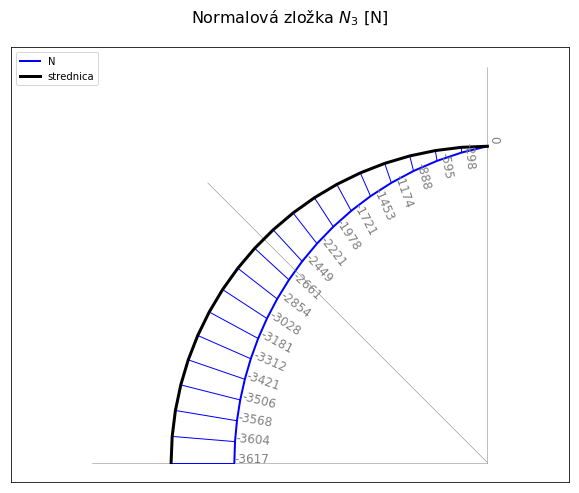

In [18]:
fig,(ax1)=plt.subplots(1,1,figsize=(10,8))
ax1.axis('equal')
ax1.tick_params(
    which='both', 
    bottom='off',      
    top='off',         
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off')

ax1.set_title('Normalová zložka $N_3$ '+r'$[\mathrm{N}]$' +'\n').set_fontsize(16)
ax1.plot(N3_plot_x,N3_plot_y,color="blue",label='N',lw=2)
for ii in grid_x:
  ax1.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodov):
  pointx=[strednica_x[ii],N3_plot_x[ii]]
  pointy=[strednica_y[ii],N3_plot_y[ii]]
  ax1.plot(pointx,pointy,color="blue",lw=1)
  ax1.text(pointx[1],pointy[1],str(int(N3_plot[ii])), \
          horizontalalignment="left",fontsize=12,color="grey", \
          rotation=(-180.*fi_[ii]/np.pi))
ax1.plot(strednica_x,strednica_y,color="black",label="strednica",lw=3)
ax1.legend(loc='upper left')

Vykreslenie výsledných šmykových síl $T(x)$:

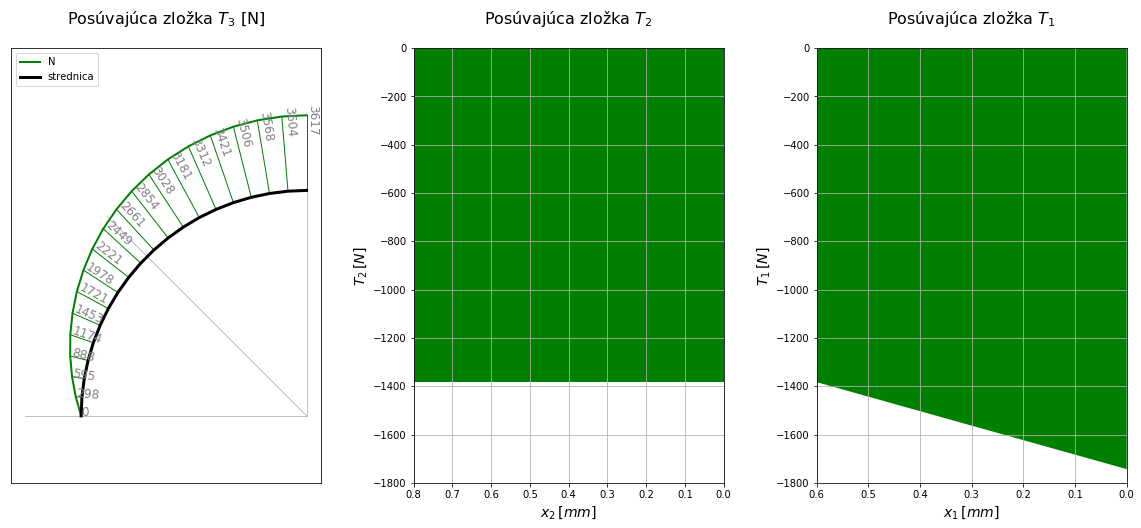

In [19]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
fig.subplots_adjust(wspace=0.3)
ax1.axis('equal')
ax1.tick_params(
    which='both', 
    bottom='off',      
    top='off',         
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off')

ax1.set_title('Posúvajúca zložka $T_3$ '+r'$[\mathrm{N}]$' +'\n').set_fontsize(16)
ax1.plot(T3_plot_x,T3_plot_y,color="green",label='N',lw=2)
for ii in grid_x:
  ax1.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodov):
  pointx=[strednica_x[ii],T3_plot_x[ii]]
  pointy=[strednica_y[ii],T3_plot_y[ii]]
  ax1.plot(pointx,pointy,color="green",lw=1)
  ax1.text(pointx[1],pointy[1],str(int(T3_plot[ii])), \
          horizontalalignment="left",fontsize=12,color="grey", \
          rotation=(-180.*fi_[ii]/np.pi))
ax1.plot(strednica_x,strednica_y,color="black",label="strednica",lw=3)
ax1.legend(loc='upper left')
ax2.fill_between(x2_,0,T2_plot,facecolor='green')
ax3.fill_between(x1_,0,T1_plot,facecolor='green')

ax2.set_xlim(0.8,0)
ax2.set_ylim(-1800,0)
ax3.set_xlim(0.6,0)
ax3.set_ylim(-1800,0)
ax2.grid(True)
ax3.grid(True)
ax2.set_xlabel(r'$x_2\,[mm]$').set_fontsize(14)
ax2.set_ylabel(r'$T_2\,[N]$').set_fontsize(14)
ax3.set_ylabel(r'$T_1\,[N]$').set_fontsize(14)
ax3.set_xlabel(r'$x_1\,[mm]$').set_fontsize(14)
ax2.set_title('Posúvajúca zložka '+r'$T_2$'+'\n').set_fontsize(16)
ax3.set_title('Posúvajúca zložka '+r'$T_1$'+'\n').set_fontsize(16)

Vykreslenie výsedných vnútorných účinkov $M(x)$:

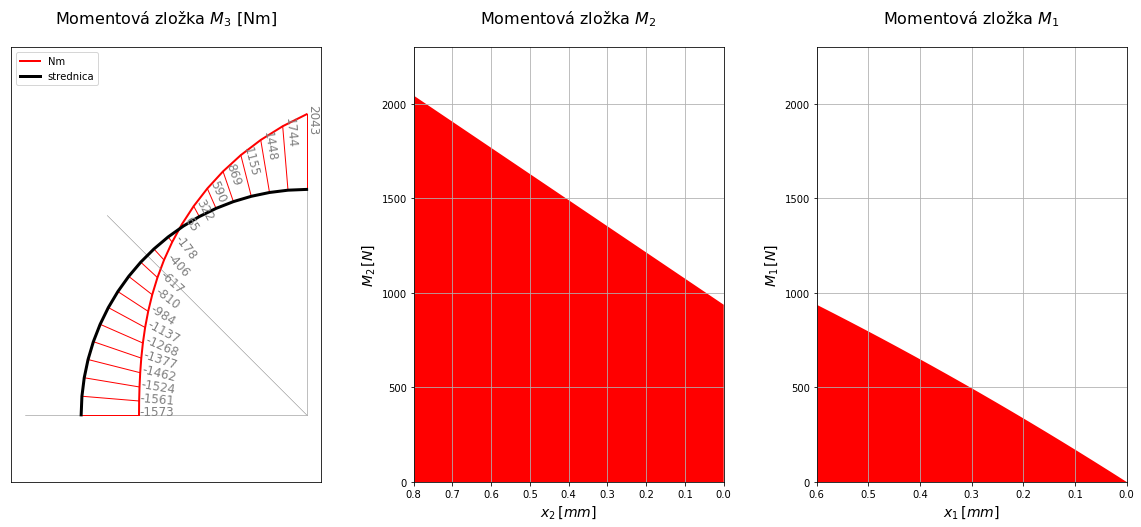

In [20]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
fig.subplots_adjust(wspace=0.3)
ax1.axis('equal')
ax1.tick_params(
    which='both', 
    bottom='off',      
    top='off',         
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off')

ax1.set_title('Momentová zložka $M_3$ '+r'$[\mathrm{Nm}]$' +'\n').set_fontsize(16)
ax1.plot(M3_plot_x,M3_plot_y,color="red",label='Nm',lw=2)
for ii in grid_x:
  ax1.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodov):
  pointx=[strednica_x[ii],M3_plot_x[ii]]
  pointy=[strednica_y[ii],M3_plot_y[ii]]
  ax1.plot(pointx,pointy,color="red",lw=1)
  ax1.text(pointx[1],pointy[1],str(int(M3_plot[ii])), \
          horizontalalignment="left",fontsize=12,color="grey", \
          rotation=(-180.*fi_[ii]/np.pi))
ax1.plot(strednica_x,strednica_y,color="black",label="strednica",lw=3)
ax1.legend(loc='upper left')
ax2.fill_between(x2_,0,M2_plot,facecolor='red')
ax3.fill_between(x1_,0,M1_plot,facecolor='red')

ax2.set_xlim(0.8,0)
ax2.set_ylim(0,2300)
ax3.set_xlim(0.6,0)
ax3.set_ylim(0,2300)
ax2.grid(True)
ax3.grid(True)
ax2.set_xlabel(r'$x_2\,[mm]$').set_fontsize(14)
ax2.set_ylabel(r'$M_2\,[N]$').set_fontsize(14)
ax3.set_ylabel(r'$M_1\,[N]$').set_fontsize(14)
ax3.set_xlabel(r'$x_1\,[mm]$').set_fontsize(14)
ax2.set_title('Momentová zložka '+r'$M_2$'+'\n').set_fontsize(16)
ax3.set_title('Momentová zložka '+r'$M_1$'+'\n').set_fontsize(16)

Extrémne napätie vyjadríme iba z momentových vnútorných účinkov $M(x)$. Ak je zrejmé z grafov, extrémnu hodnotu nadobúda moment $M_2(x)$ pre $x_2=b=0.8\,m$ alebo moment $M_3(\varphi)$ pre $\varphi=0$.

In [21]:
M3_max = M3_.subs(fi,0)
M2_max = M2_.subs(x2,b_)
round(float(M3_max),3), round(float(M2_max),3)

Príslušné ohybové napätie pre zaťaženie momentom $M_{3max}$ sa spočíta podľa vzťahu $$\sigma_o = \frac{M_3(\varphi=0)}{W_o}$$


$$W_o = \frac{\pi d^3}{32}$$

In [22]:
Wo= np.pi*d_**3/32
sigma_max=M3_max/Wo/1e6
float(sigma_max)
o = 'Maximálny ohybový moment je ' +repr(round(float(M3_max),3))+ ' Nm a maximálne ohybové napätie je ' +repr(round(float(sigma_max),3))+ ' Pa.'
print(o)

Maximálny ohybový moment je 2043.714 Nm a maximálne ohybové napätie je 166.537 Pa.


Určenie bezpečnosti a porovnanie výslednej hodnoty s povolenou hodnotou $k_D$:

In [23]:
kk=sigmaK_/sigma_max
kk>kD_, float(kk)

Z podmienky vyplýva, že daný prút pevnostne nevyhovuje.